<a href="https://colab.research.google.com/github/Prabin1025y/NN-from-scratch/blob/main/NN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#ReLU activation function definition
def ReLU(x):
  return np.maximum(0, x)


In [ ]:
#Softmax activation function to convert logits into probabilities
def soft_max(x):
  e_stable = np.exp(x - np.max(x, axis=0, keepdims=True))
  return e_stable / sum(e_stable)

In [ ]:
#One hot encoding to encode categorical data
def one_hot_encode(x, number_of_classes = 10):
  encoded_x = np.zeros((len(x), number_of_classes))
  for index, label in enumerate(x):
    encoded_x[index][int(label)] = 1
  return encoded_x.T


In [ ]:
#derivative of ReLU function
def derive_ReLU(x):
  return x > 0

In [ ]:
def init_params(X, input_nodes_size, hidden_nodes_size, output_nodes_size):
  a0 = X
  w1 = np.random.rand(hidden_nodes_size,input_nodes_size) - 0.5 #initialize random weight for first connections
  b1 = np.random.rand(hidden_nodes_size,1) - 0.5 #initialize random bias for first connections
  w2 = np.random.rand(output_nodes_size,hidden_nodes_size) - 0.5
  b2 = np.random.rand(output_nodes_size,1) - 0.5
  return a0, w1, b1, w2, b2

#forward propagation start to predict the outcome using weights and bias
def forward_prop(a0, w1, b1, w2, b2):
  z1 = w1.dot(a0) + b1
  a1 = ReLU(z1)

  z2 = w2.dot(a1) + b2
  a2 = soft_max(z2)
  return a1, z1, a2, z2

#backward propagation to determine error and values to be changed
def backward_prop(a0, a1, a2, z1, z2, w2, y_train):
  m = a0.shape[1]
  y_encoded = one_hot_encode(y_train)

  dz2 = a2 - y_encoded
  dw2 = (1/m) * dz2.dot(a1.T)
  db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)

  dz1 = w2.T.dot(dz2) * derive_ReLU(z1)
  dw1 = (1/m) * dz1.dot(a0.T)
  db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)

  return dw1, db1, dw2, db2

#optimize parameters using gradient descent
def optimize_params(w1, b1, w2, b2, dw1, db1, dw2, db2, lr):
  w1 = w1 - lr * dw1
  b1 = b1 - lr * db1
  w2 = w2 - lr * dw2
  b2 = b2 - lr * db2
  return w1, b1, w2, b2


In [ ]:
#calculate error
def get_acc(a2, y):
  return np.sum(np.argmax(a2,0) == y)/ y.size

In [ ]:
def gradient_descent(a0, w1, b1, w2, b2,Y,iterations, lr):

  error_list = []
  for i in range(iterations):
    a1, z1, a2, z2 = forward_prop(a0, w1, b1, w2, b2)
    dw1, db1, dw2, db2 = backward_prop(a0,a1,a2,z1,z2,w2,Y)
    w1, b1, w2, b2 = optimize_params(w1, b1, w2, b2, dw1, db1, dw2, db2, lr)

    loss = -np.sum(one_hot_encode(Y) * np.log(a2)) / Y.size
    error_list.append(loss)

    if i%10 == 0:
      print("Iteration: ", i)
      print("Accuracy:", get_acc(a2, Y))
      print("Error: ", error_list[i])

  plt.plot(error_list)
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.title('Training Loss Over Time')
  plt.show()
  return w1, b1, w2, b2




In [ ]:
def make_prediction(X, w1, b1, w2, b2):
  ___, __, a2, ___ = forward_prop(X, w1, b1, w2, b2)
  prediction = np.argmax(a2, 0)
  # print(a2)
  return prediction

def test_prediction(X,Y, index,i, w1, b1, w2, b2):
  current_image = X[:, index, None]
  prediction = make_prediction(current_image, w1, b1, w2, b2)
  label = Y[index]

  # print("prediction: ", prediction)
  # print("label: ", label)

  current_image = current_image.reshape((28,28)) * 255
  plt.gray()
  plt.subplot(5,5,i+1)
  plt.xlabel(f"pred: {prediction[0]} actual: ({label})")
  plt.xticks([])
  plt.yticks([])
  plt.imshow(current_image, interpolation="nearest")
  # plt.show()


# **Using this NN to classify mnist**


In [ ]:
import tensorflow as tf #for dataset loading

In [ ]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
#preparing data as required by the model
print(X_train.shape)
X_train = np.reshape(X_train, (60000, 784))
X_train = X_train.T
X_train = X_train / 255
print(X_train.shape)

(60000, 28, 28)
(784, 60000)


In [ ]:
print(X_test.shape)
X_test = np.reshape(X_test, (10000, 784))
X_test = X_test.T
X_test = X_test / 255
print(X_test.shape)

(10000, 28, 28)
(784, 10000)


In [ ]:
a0, w1, b1, w2, b2 = init_params(X_train, 28 * 28, 40, 10)

Iteration:  0
Accuracy: 0.17726666666666666
Error:  3.9988572697805695
Iteration:  10
Accuracy: 0.3967
Error:  1.8766586878603058
Iteration:  20
Accuracy: 0.5385166666666666
Error:  1.3994674083811394
Iteration:  30
Accuracy: 0.6194666666666667
Error:  1.1592191093439224
Iteration:  40
Accuracy: 0.6681833333333334
Error:  1.0130509303191215
Iteration:  50
Accuracy: 0.70305
Error:  0.9136446034189045
Iteration:  60
Accuracy: 0.7283666666666667
Error:  0.841040926488334
Iteration:  70
Accuracy: 0.7484833333333333
Error:  0.7851927422199997
Iteration:  80
Accuracy: 0.7640333333333333
Error:  0.740641270981694
Iteration:  90
Accuracy: 0.7768333333333334
Error:  0.704088013593523
Iteration:  100
Accuracy: 0.7883333333333333
Error:  0.6734599007500324
Iteration:  110
Accuracy: 0.7976333333333333
Error:  0.647360535529779
Iteration:  120
Accuracy: 0.80575
Error:  0.6247542369489504
Iteration:  130
Accuracy: 0.81245
Error:  0.6049448923718024
Iteration:  140
Accuracy: 0.81855
Error:  0.5874191

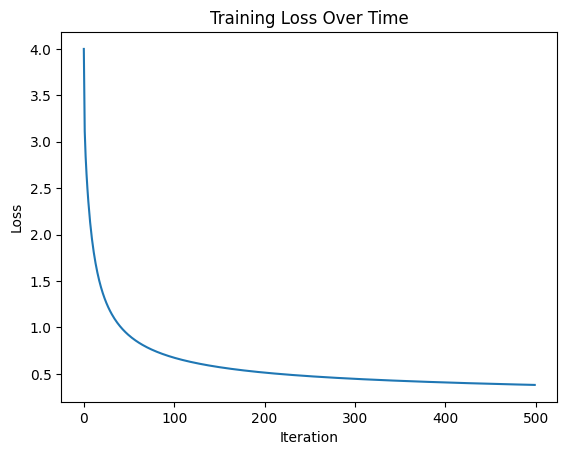

In [ ]:
w1, b1, w2, b2 = gradient_descent(a0, w1, b1, w2, b2, y_train, 500, 0.1)

<function matplotlib.pyplot.show(close=None, block=None)>

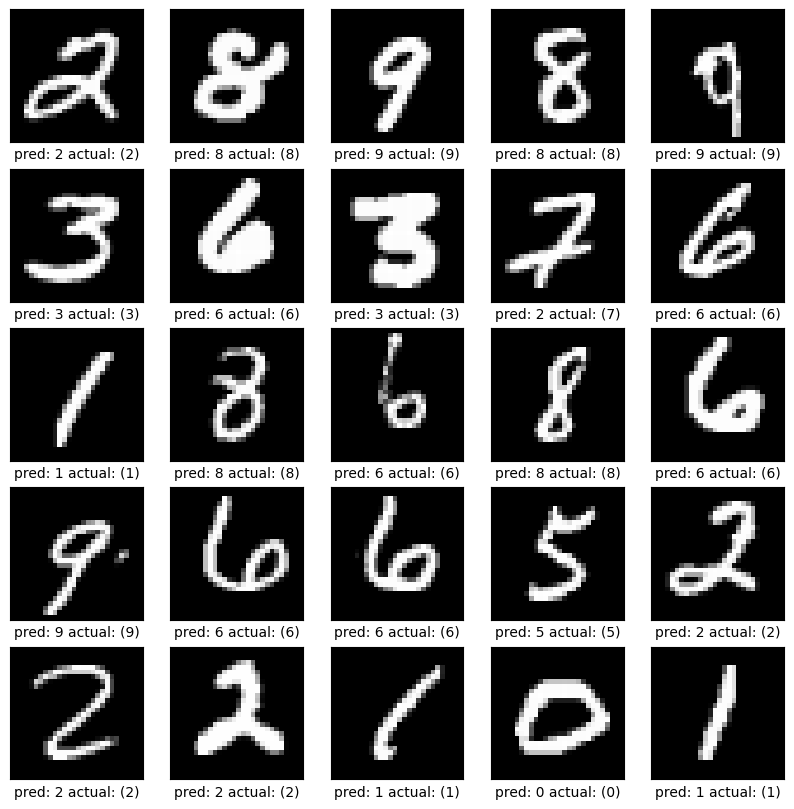

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  index = np.random.randint(0, 10000)
  # print("index: ", index)
  test_prediction(X_test, y_test, index, i, w1, b1, w2, b2)
plt.show

# **Using this NN to solve fashion Mnist**

In [ ]:
(X_train_fashion, y_train_fashion),(X_test_fashion, y_test_fashion) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
fashion_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print(X_train_fashion.shape)
X_train_fashion = np.reshape(X_train_fashion, (60000, 28 * 28))
X_train_fashion = X_train_fashion.T
X_train_fashion = X_train_fashion / 255
print(X_train_fashion.shape)

(60000, 28, 28)
(784, 60000)


In [ ]:
print(X_test_fashion.shape)
X_test_fashion = np.reshape(X_test_fashion, (10000, 28 * 28))
X_test_fashion = X_test_fashion.T
X_test_fashion = X_test_fashion / 255
print(X_test_fashion.shape)

(10000, 28, 28)
(784, 10000)


In [ ]:
a0, w1, b1, w2, b2 = init_params(X_train_fashion, 28 * 28, 40, 10)

Iteration:  0
Accuracy: 0.10291666666666667
Error:  5.426472976910241
Iteration:  10
Accuracy: 0.49955
Error:  1.4906166889175525
Iteration:  20
Accuracy: 0.59595
Error:  1.175980186761854
Iteration:  30
Accuracy: 0.6367
Error:  1.0354204424380435
Iteration:  40
Accuracy: 0.66395
Error:  0.9515178143917493
Iteration:  50
Accuracy: 0.6830166666666667
Error:  0.8948704329804956
Iteration:  60
Accuracy: 0.6964
Error:  0.8539506697693844
Iteration:  70
Accuracy: 0.7075666666666667
Error:  0.8224333277951842
Iteration:  80
Accuracy: 0.7157333333333333
Error:  0.7973084940303931
Iteration:  90
Accuracy: 0.72295
Error:  0.7765774563051733
Iteration:  100
Accuracy: 0.7291333333333333
Error:  0.7587723906232616
Iteration:  110
Accuracy: 0.7341833333333333
Error:  0.7436623779506951
Iteration:  120
Accuracy: 0.7392166666666666
Error:  0.7306160957775086
Iteration:  130
Accuracy: 0.7433666666666666
Error:  0.7186666084694241
Iteration:  140
Accuracy: 0.74765
Error:  0.7078645554129886
Iteration: 

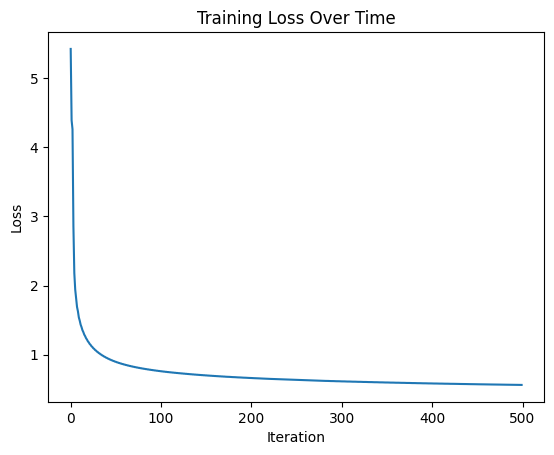

In [ ]:
w1, b1, w2, b2 = gradient_descent(a0, w1, b1, w2, b2, y_train_fashion, 500, 0.1)

<function matplotlib.pyplot.show(close=None, block=None)>

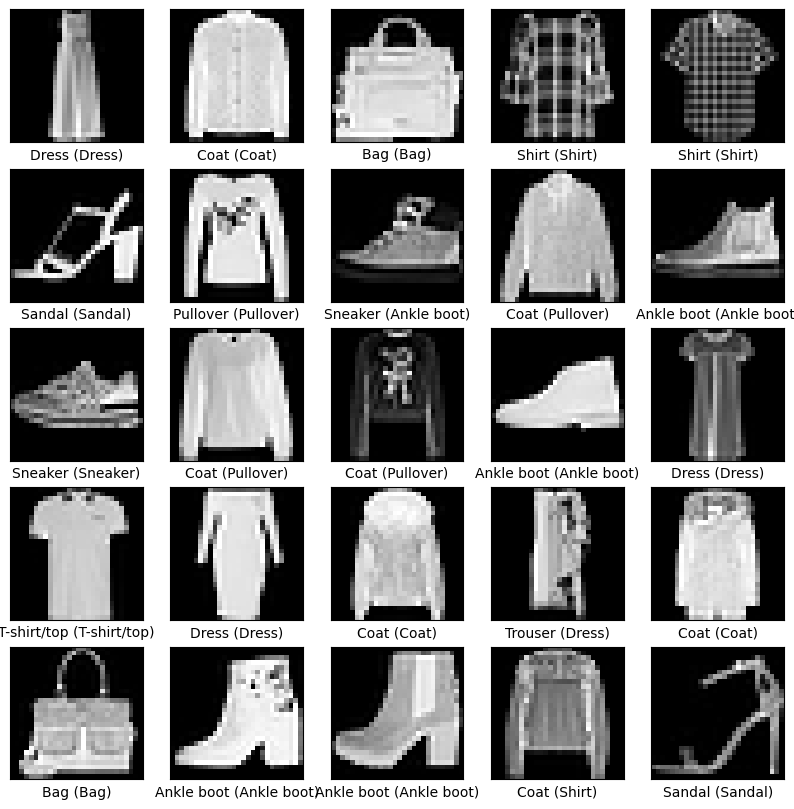

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  index = np.random.randint(0, 10000)
  # print("index: ", index)
  current_image = X_test_fashion[:, index, None]
  prediction = make_prediction(current_image, w1, b1, w2, b2)
  label = fashion_names[y_test_fashion[index]]

  # print("prediction: ", prediction)
  # print("label: ", label)

  current_image = current_image.reshape((28,28)) * 255
  plt.gray()
  plt.subplot(5,5,i+1)
  plt.xlabel(f"{fashion_names[prediction[0]]} ({label})")
  plt.xticks([])
  plt.yticks([])
  plt.imshow(current_image, interpolation="nearest")
plt.show